# Lecture 11: Dynamic range control
Audio Processing, MED4, Aalborg University, 2021

Jesper Kjær Nielsen (jkn@create.aau.dk) and Cumhur Erkut cer@create.aau.dk

Last edited: 2021-03-18

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-dynamic-range-control?" data-toc-modified-id="What-is-dynamic-range-control?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is dynamic range control?</a></span><ul class="toc-item"><li><span><a href="#The-loudness-war:-abuse-of-dynamic-range-compression" data-toc-modified-id="The-loudness-war:-abuse-of-dynamic-range-compression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The loudness war: abuse of dynamic range compression</a></span></li><li><span><a href="#Dynamic-range-compression-put-to-good-use" data-toc-modified-id="Dynamic-range-compression-put-to-good-use-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dynamic range compression put to good use</a></span></li><li><span><a href="#Dynamic-range-control" data-toc-modified-id="Dynamic-range-control-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dynamic range control</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Level-measurement" data-toc-modified-id="Level-measurement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Level measurement</a></span><ul class="toc-item"><li><span><a href="#Sliding-window-filtering" data-toc-modified-id="Sliding-window-filtering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sliding window filtering</a></span></li><li><span><a href="#Exponential-window-filtering" data-toc-modified-id="Exponential-window-filtering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exponential window filtering</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Gain-computation" data-toc-modified-id="Gain-computation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gain computation</a></span><ul class="toc-item"><li><span><a href="#What-are-and-why-decibels-(dB)?" data-toc-modified-id="What-are-and-why-decibels-(dB)?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What are and why decibels (dB)?</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Gain-smoothing" data-toc-modified-id="Gain-smoothing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gain smoothing</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## What is dynamic range control?
In the next 20 minutes, you will learn
- what dynamic range control is used for
- what the negative and positive sides of dynamic range control are
- what the loudness war is

**Dynamic range control** is an umbrella terms covering two basic things:
- dynamic range expansion: make weak sounds weaker and/or make loud sounds louder
- dynamic range compression: make weak sounds louder and/or make loud sounds weaker

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DnrIllustration.png?raw=1" alt="DNR illustration" width="90%"/>
</center>

### The loudness war: abuse of dynamic range compression
**Loudness** is how loud you **perceive** a sound to be, i.e., a subjective measure of sound pressure.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/equalLoudnessCurves.png?raw=1" alt="Equal loudness curves" width="60%"/>
</center>

Music enthusiasts often complain about the abuse of dynamic range compression.

<br />
<center>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=dcKDMBuGodU
" target="_blank"><img src="http://img.youtube.com/vi/dcKDMBuGodU/0.jpg" 
alt="How sound works (in rooms)" width="480" height="360" border="10" /></a>
</center>

Dynamic range compression in The Beatles's Something

<br/>
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/305px-Cd_loudness_trend-something.gif?raw=1" alt="DNR in Something" width="80%"/>
</center>

### Dynamic range compression put to good use
Dynamic range compression is not only bad:
- In public spaces, weak sounds can be made audible over background noise (e.g., while commuting with headphones)
- In movies, dialogue can more easily be heard and understood when amplified relative to, e.g., explotions
- Cheaper power amplifiers can be used
- In hearing aids and hearing protection units, really loud sounds can be attenuated while weaker sound can be amplified.

Dynamic range compression might make weak in-game sounds (such as foot steps) audible when the crowd is cheering.

<br />
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/astralis.jpg?raw=1" alt="Astralis" width="80%"/>
</center>

### Dynamic range control
Dynamic range control is to multiply the input signal $x_n$ with a time-varying gain $g_n$, i.e.,
$$
    y_n = g_n x_n\ .
$$
The gain $g_n$, however, depends on the input signal so to compute it, we have to
1. measure the level of the input signal
2. compute the desired gain (depends on whether we wish to increase or decrease the dynamic range)
3. apply some smoothing to the gain to make it sound nicer

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

#### Example: gate
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExampleGate.png?raw=1" alt="Example of gate" width="100%"/>
</center>

### Summary
1. Dynamic range control is used for
- dynamic range compression: increase weaker sounds and decrease louder sounds
- dynamic range expansion: make weak sounds weaker and/or make loud sounds louder
2. Dynamic range control is implemented as
$$
    y_n = g_n x_n\ .
$$
The gain $g_n$ depends on the input signal and how we want to modify the signal (compress or expand).

### Active 5 minutes break
Listen carefully to Imagine Dragon's Radioactive from 2012. Is dynamic range compression or expansion used?

<br />
<center>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=ktvTqknDobU
" target="_blank"><img src="http://img.youtube.com/vi/ktvTqknDobU/0.jpg" 
alt="How sound works (in rooms)" width="480" height="360" border="10" /></a>
</center>

Dynamic range compression in Imagine Dragon's Radioactive

<br />
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/radioactiveAudacity.png?raw=1" alt="DNR in Radioactive" width="90%"/>
</center>

## Level measurement
In the next 20 minutes, you will learn
- that estimating the level of signal can essentially be done using a **lowpass filter**
- two different ways of doing level measurements:
 - sliding window
 - exponential window

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

Goal: The **level measurement** block should produce the **envelope** or **level** $\tilde{x}_n$ of the input signal $x_n$.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelMeasurementsSketch.png?raw=1" alt="Sketch of level measurement" width="90%"/>
</center>

The figure below shows how an ideal level measurement block works.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelMeasurementIllustration.png?raw=1" alt="Sketch of level measurement" width="80%"/>
</center>

There are three things happening inside the level measurement block:
1. We compute the square of the input signal $x_n$
2. We lowpass filter the squared signal $x_n^2$
3. We compute the square-root of the filtered signal $\tilde{x}_n^2$

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelMeasurementBlockInternals.png?raw=1" alt="Inside the level measurement block" width="80%"/>
</center>

Consider a filter with difference equation
$$
    \tilde{x}_n^2 = \sum_{m=0}^{\infty} h_m x_{n-m}^2
$$
where the $h_m$'s are the **filter coefficients** of the filter. Since the filter is a feedforward filter, the filter coefficients are equal to the impulse response of the filter.

Many ways of designing the filter, but we will consider two common choices here (see more in the book):
1. sliding window filter
2. exponential window filter

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelMeasurementBlockInternals.png?raw=1" alt="Inside the level measurement block" width="60%"/>
</center>

### Sliding window filtering
We obtain the **sliding window filtering** by setting the filter coefficients as
$$
    h_m = \begin{cases}
        1/M & m = 0,1,\ldots, M-1\\
        0 & \text{otherwise}
        \end{cases}\ .
$$

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11SlidingWindowFilterCoef.png?raw=1" alt="Sliding window filter coefficients" width="80%"/>
</center>

For this choice of filter coefficients, the difference equation can be written as
$$
    \tilde{x}_n^2 = \sum_{m=0}^{\infty} h_m x_{n-m}^2 = \frac{1}{M}\sum_{m=0}^{M-1} x_{n-m}^2
$$
which is simply the **mean** of the current and past $M-1$ samples!

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11SlidingWindowSketch.png?raw=1" alt="Sliding window sketch" width="80%"/>
</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

try:
  import google.colab
  IN_COLAB = True
  !mkdir -p data
  !wget https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lectureB_Dynamic_Range_Control/data/guitar.ff.sulB.B3.wav -P data
  !wget https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lectureB_Dynamic_Range_Control/data/guitar.wav -P data
except:
  IN_COLAB = False

samplingFreq, signal = wave.read('data/guitar.ff.sulB.B3.wav')
signal = signal/2**15 # normalise
ipd.Audio(signal, rate=samplingFreq) 

--2021-04-28 07:15:15--  https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lectureB_Dynamic_Range_Control/data/guitar.ff.sulB.B3.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793824 (775K) [audio/wav]
Saving to: ‘data/guitar.ff.sulB.B3.wav’

guitar.ff.sulB.B3.w 100%[===================>] 775.22K  --.-KB/s    in 0.05s   

2021-04-28 07:15:16 (15.5 MB/s) - ‘data/guitar.ff.sulB.B3.wav’ saved [793824/793824]

--2021-04-28 07:15:16--  https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lectureB_Dynamic_Range_Control/data/guitar.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [2]:
def slidingWindowLevelMeasurement(inputSignal, windowLength):
    nData = np.size(inputSignal)
    filteredSignalPower = np.zeros(nData)
    inputSignalPower = inputSignal**2
    for n in np.arange(nData):
        if n < windowLength:
            startIdx = 0
        else:
            startIdx = n-windowLength+1
        filteredSignalPower[n] = np.mean(inputSignalPower[startIdx:n+1])
    return np.sqrt(filteredSignalPower)

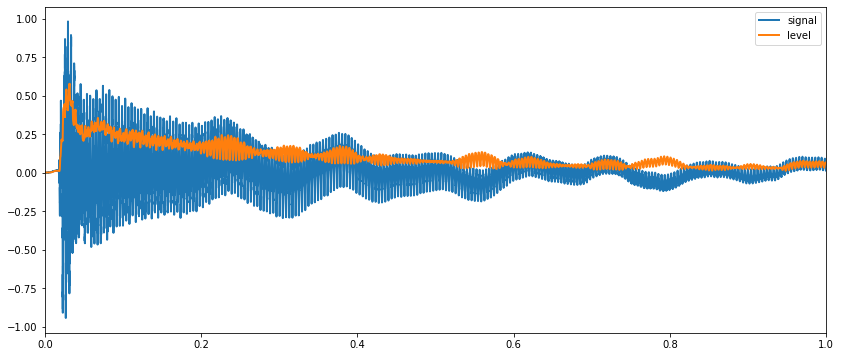

In [3]:
windowLength = 100 # samples
slidingSignalLevel = slidingWindowLevelMeasurement(signal, windowLength)
timeVector = np.arange(np.size(signal))/samplingFreq
plt.figure(figsize=(14,6))
plt.plot(timeVector, signal, linewidth=2, label='signal')
plt.plot(timeVector, slidingSignalLevel, linewidth=2, label='level')
plt.xlim((0,1)), plt.legend();

### Exponential window filtering
We obtain the **exponential window filtering** by setting the filter coefficients as
$$
    h_m = \begin{cases}
        (1-\lambda)\lambda^{m} & m \geq 0\\
        0 & \text{otherwise}
        \end{cases}
$$
where $0\leq\lambda<1$ is a so-called **forgetting factor**.

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExponentialWindowFilterCoef.png?raw=1" alt="Exponential window filter coefficients" width="80%"/>
</center>

For this choice of filter coefficients, the difference equation can be written as
\begin{align}
    \tilde{x}_n^2 &= \sum_{m=0}^{\infty} h_m x_{n-m}^2 = (1-\lambda)\sum_{m=0}^{\infty} \lambda^m x_{n-m}^2\\
    &= (1-\lambda)\lambda^0x_{n}^2 + (1-\lambda)\sum_{m=1}^{\infty} \lambda^m x_{n-m}^2\\
    &= (1-\lambda)x_{n}^2 + \alpha(1-\lambda)\sum_{m=1}^{\infty} \lambda^{m-1} x_{n-m}^2\\
    &= (1-\lambda)x_{n}^2 + \lambda(1-\lambda)\sum_{m'=0}^{\infty} \lambda^{m'} x_{(n-1)-m'}^2\\
    &= (1-\lambda)x_{n}^2 + \lambda\tilde{x}_{n-1}^2
\end{align}
which is simply a **first-order feedback filter**!

Exponential window filtering is a simple feedback filter

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelExpFeedbackFilter.png?raw=1" alt="Exponential window as feedback filter" width="80%"/>
</center>

The exponential window uses all past samples, but the most recent ones are given a larger weight than the the older samples.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExponentialWindowSketch.png?raw=1" alt="Exponential window sketch" width="80%"/>
</center>

In [15]:
def expWindowLevelMeasurement(inputSignal, forgettingFactor):
    nData = np.size(inputSignal)
    filteredSignalPower = np.zeros(nData)
    inputSignalPower = inputSignal**2
    for n in np.arange(nData):
        if n == 0:
            filteredSignalPower[n] = (1-forgettingFactor)*inputSignalPower[0]
        else:
            filteredSignalPower[n] = (1-forgettingFactor)*inputSignalPower[n]+ \
                forgettingFactor*filteredSignalPower[n-1]
    return np.sqrt(filteredSignalPower)

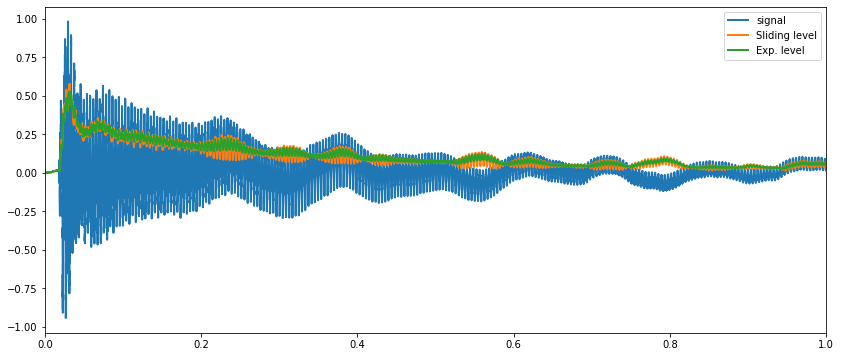

In [16]:
forgettingFactor = 0.99 
expSignalLevel = expWindowLevelMeasurement(signal, forgettingFactor)
plt.figure(figsize=(14,6))
plt.plot(timeVector, signal, linewidth=2, label='signal')
plt.plot(timeVector, slidingSignalLevel, linewidth=2, label='Sliding level')
plt.plot(timeVector, expSignalLevel, linewidth=2, label='Exp. level')
plt.xlim((0,1)), plt.legend();

### Summary
1. Measuring the level of a signal is generally done as illustrated on the figure.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelMeasurementBlockInternals.png?raw=1" alt="Inside the level measurement block" width="60%"/>
</center>
2. Although the filter can be designed in multiple ways, two common choices are
 - **sliding window**: compute the mean of the $M$ most recent samples
 - **exponential window**: apply a first-order feedback filter as illustrated below
 
 <center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LevelExpFeedbackFilter.png?raw=1" alt="Exponential window as feedback filter" width="60%"/>
</center>

## Gain computation using compressor and limiter
In the next 20 minutes, you will learn
- what decibels are and why we often use it
- how dynamic range compression can be performed using a
 - compressor
 - limiter

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

### What are and why decibels (dB)?
Which of the following increases in level is perceived the loudest?
1. power in a sound is increased by **9** from 1 to 10
2. power in a sound is increased by **90** from 10 to 100

Human hearing is **logarithmic** so loudness difference in the two examples above are perceived the same!

The decibel (dB) scale is logarithmic and often used in connection with human hearing.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/noise-levels.png?raw=1" alt="Noise levels" width="80%"/>
</center>

We can express the level $\tilde{x}_n$ in decibel dB as
$$
    \tilde{X}_n = 20\log_{10}(\tilde{x}_n)\ .
$$

Since
$$
    \log_{10}(ab) = \log_{10}(a) + \log_{10}(b)\ ,
$$
we obtain that
\begin{align}
    \tilde{Y}_n &= 20\log_{10}(\tilde{y}_n) = 20\log_{10}(g_n\tilde{x}_n)\\
    &= 20\log_{10}(g_n) + 20\log_{10}(\tilde{x}_n) = G_n + \tilde{X}_n\ .
\end{align}

Thus,
- multiplication is replaced by summation when using dB
- a gain of 1 one corresponds to 0 dB

#### Example: gain increase by 10
Assume that we set $g_n = 10$. Then
$$
    G_n = 20\log_{10}(10) = 20\ \text{dB}\ .
$$

Thus, a ten-doubling of the level corresponds to a gain increase of 20 dB!

### Compressor
A compressor **compresses** the signal level above a threshold $T$ (in dB) with **compression factor** R.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11CompressorSketch.png?raw=1" alt="Compressor sketch" width="80%"/>
</center>

From the figure, we have
\begin{align}
    \tilde{Y}_n &= \begin{cases}
        \tilde{X}_n & \tilde{X}_n \leq T\\
        R^{-1}\tilde{X}_n + (1-R^{-1})T & \tilde{X}_n > T
    \end{cases}\\
    &= \begin{cases}
        \tilde{X}_n & \tilde{X}_n \leq T\\
        R^{-1}(\tilde{X}_n-T) + T & \tilde{X}_n > T
    \end{cases}\ .
\end{align}
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11CompressorSketch.png?raw=1" alt="Compressor sketch" width="60%"/>
</center>

To calculate the gain $g_n$ corresponding to this curve, we see for $\tilde{X}_n \leq T$ that
\begin{align}
    g_n &= \frac{\tilde{y}_n}{\tilde{x}_n} = \frac{10^{\tilde{Y}_n/20}}{10^{\tilde{X}_n/20}} = 1\ .
\end{align}

For $\tilde{X}_n > T$, we get
\begin{align}
    g_n &= \frac{\tilde{y}_n}{\tilde{x}_n} = \frac{10^{\tilde{Y}_n/20}}{\tilde{x}_n} = \frac{10^{(R^{-1}(\tilde{X}_n-T) + T)/20}}{\tilde{x}_n}\\
    &= \frac{(\tilde{x}_n10^{-T/20})^{R^{-1}}}{\tilde{x}_n10^{-T/20}} = (\tilde{x}_n10^{-T/20})^{R^{-1}-1} 
\end{align}

Thus,
$$
    g_n = \begin{cases}
        1 & \tilde{X}_n \leq T\\
        (\tilde{x}_n10^{-T/20})^{R^{-1}-1} & \tilde{X}_n > T
    \end{cases}\ .
$$

In [17]:
def compressorGain(inputLevel, thresholdDb, compressionFactor):
    nData = np.size(inputLevel)
    gain = np.zeros(nData)
    threshold = 10**(thresholdDb/20)
    for n in np.arange(nData):
        if inputLevel[n] <= threshold:
            gain[n] = 1
        else:
            gain[n] = (inputLevel[n]/threshold)**(1/compressionFactor-1)
    return gain

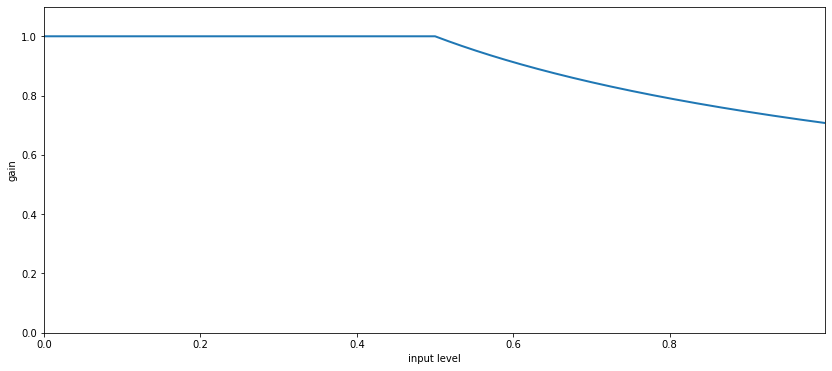

In [18]:
nData = 1000
inputLevel = np.arange(nData)/nData
thresholdDb = 20*np.log10(0.5)
compressionFactor = 2
gain = compressorGain(inputLevel, thresholdDb, compressionFactor)
plt.figure(figsize=(14,6))
plt.plot(inputLevel, gain, linewidth=2)
plt.xlabel('input level'), plt.ylabel('gain')
plt.xlim((inputLevel[0],inputLevel[-1])), plt.ylim((0,1.1));

### Limiter
The limiter is equal to the compressor when the compression factor is set to infinite.

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11LimiterSketch.png?raw=1" alt="Compressor sketch" width="80%"/>
</center>

The limiter can be described as
\begin{align}
    \tilde{Y}_n &= \begin{cases}
        \tilde{X}_n & \tilde{X}_n \leq T\\
        T & \tilde{X}_n > T
    \end{cases}
\end{align}
which results in the gain computation
$$
    g_n = \begin{cases}
        1 & \tilde{X}_n \leq T\\
        (\tilde{x}_n10^{-T/20})^{-1} & \tilde{X}_n > T
    \end{cases}\ .
$$

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11CompressorSketch.png?raw=1" alt="Compressor sketch" width="50%"/>
</center>

In [8]:
def limiterGain(inputLevel, thresholdDb):
    nData = np.size(inputLevel)
    gain = np.zeros(nData)
    threshold = 10**(thresholdDb/20)
    for n in np.arange(nData):
        if inputLevel[n] <= threshold:
            gain[n] = 1
        else:
            gain[n] = threshold/inputLevel[n]
    return gain

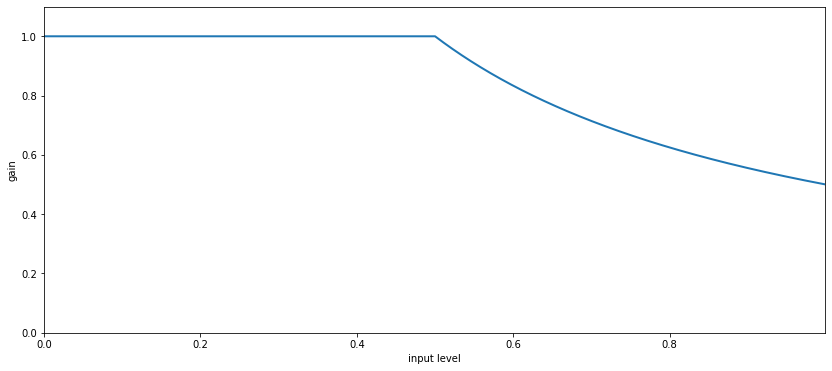

In [9]:
nData = 1000
inputLevel = np.arange(nData)/nData
thresholdDb = 20*np.log10(0.5)
gain = limiterGain(inputLevel, thresholdDb)
plt.figure(figsize=(14,6))
plt.plot(inputLevel, gain, linewidth=2)
plt.xlabel('input level'), plt.ylabel('gain')
plt.xlim((inputLevel[0],inputLevel[-1])), plt.ylim((0,1.1));

### Summary
1. Decibels (dB) are often used since the human hearing is logarithmic
2. Dynamic range compression can be performed using
 - compressor: everything above a threshold (in dB) is compressed with a compression factor
 - limiter: everyting above a threshold (in dB) is limited to that threshold
 
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11CompressorSketch.png?raw=1" alt="Compressor sketch" width="60%"/>
</center>

### Active 5 minutes break
We have now been through the level computation and the gain computation (for compression).
1. With your neighbour, summarise how the level measurement and gain computation work for compression.
2. Sketch what the output of the level measurement and gain computation blocks are when the input signal is a sinus with a linearly increasing amplitude. Assume that we wish to implement the limiter.
3. With your neighbour, discuss how you would implement the gain smoothing

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

## Gain computation using expander and gate
In the next 20 minutes, you will learn
- how dynamic range expansion can be performed using a
 - compressor
 - limiter
- how gain smoothing is performed

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

### Expander
An expander **expands** the signal level below a threshold $T$ (in dB) with **compression factor** R.
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExpanderSketch.png?raw=1" alt="Expander sketch" width="80%"/>
</center>

From the figure, we have
\begin{align}
    \tilde{Y}_n &= \begin{cases}
        R^{-1}\tilde{X}_n + (1-R^{-1})T & \tilde{X}_n \leq T\\
        \tilde{X}_n & \tilde{X}_n > T
    \end{cases}\\
    &= \begin{cases}
        R^{-1}(\tilde{X}_n-T) + T & \tilde{X}_n \leq T\\
        \tilde{X}_n & \tilde{X}_n > T
    \end{cases}\ .
\end{align}
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExpanderSketch.png?raw=1" alt="Expander sketch" width="60%"/>
</center>

Using same procedure as for the compressor, we get that the gain of the expander is
$$
    g_n = \begin{cases}
        (\tilde{x}_n10^{-T/20})^{R^{-1}-1} & \tilde{X}_n \leq T\\
        1 & \tilde{X}_n > T
    \end{cases}\ .
$$

In [19]:
def expanderGain(inputLevel, thresholdDb, compressionFactor):
    nData = np.size(inputLevel)
    gain = np.zeros(nData)
    threshold = 10**(thresholdDb/20)
    for n in np.arange(nData):
        if inputLevel[n] <= threshold:
            gain[n] = (inputLevel[n]/threshold)**(1/compressionFactor-1)
        else:
            gain[n] = 1
    return gain

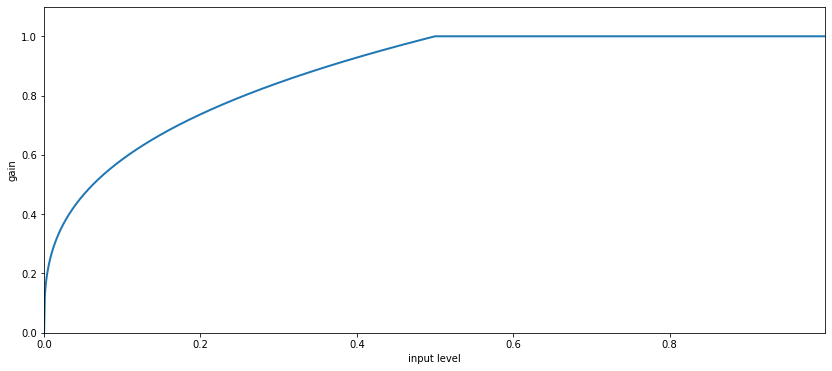

In [20]:
nData = 1000
inputLevel = np.arange(nData)/nData
thresholdDb = 20*np.log10(0.5)
compressionFactor = 0.75
gain = expanderGain(inputLevel, thresholdDb, compressionFactor)
plt.figure(figsize=(14,6))
plt.plot(inputLevel, gain, linewidth=2)
plt.xlabel('input level'), plt.ylabel('gain')
plt.xlim((inputLevel[0],inputLevel[-1])), plt.ylim((0,1.1));

### Gate
The gate is equal to the expander when the compression factor is set to 0.

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11GateSketch.png?raw=1" alt="Gate sketch" width="80%"/>
</center>

The gate can be described as
\begin{align}
    \tilde{Y}_n &= \begin{cases}
        0 & \tilde{X}_n < T\\
        \tilde{X}_n & \tilde{X}_n \geq T
    \end{cases}
\end{align}
which results in the gain computation
$$
    g_n = \begin{cases}
        0 & \tilde{X}_n < T\\
        1 & \tilde{X}_n \geq T
    \end{cases}\ .
$$

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11GateSketch.png?raw=1" alt="Gate sketch" width="50%"/>
</center>

In [21]:
def gateGain(inputLevel, thresholdDb):
    nData = np.size(inputLevel)
    gain = np.zeros(nData)
    threshold = 10**(thresholdDb/20)
    for n in np.arange(nData):
        if inputLevel[n] <= threshold:
            gain[n] = 0
        else:
            gain[n] = 1
    return gain

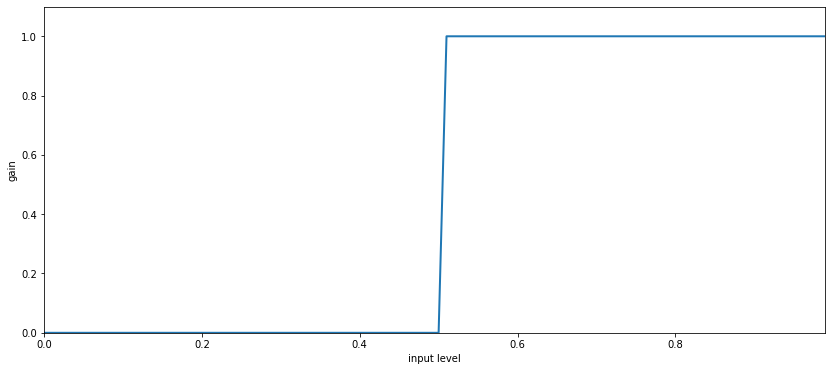

In [22]:
nData = 100
inputLevel = np.arange(nData)/nData
thresholdDb = 20*np.log10(0.5)
gain = gateGain(inputLevel, thresholdDb)
plt.figure(figsize=(14,6))
plt.plot(inputLevel, gain, linewidth=2)
plt.xlabel('input level'), plt.ylabel('gain')
plt.xlim((inputLevel[0],inputLevel[-1])), plt.ylim((0,1.1));

### Gain smoothing
In the final block, we apply some gain smoothing to make the dynamic range control sound nice:
1. not too many fluctuations in the gain
2. should react fairly quickly to a rising input level
3. should react fairly slowly to a decreasing input level

<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11DynamicRangeBlockDiagram.png?raw=1" alt="Block diagram" width="80%"/>
</center>

The gain smoothing can be performed using a **lowpass filter** with filter coefficients following an **exponential window**, i.e.,
$$
   g_n = (1-\gamma) f_n + \gamma g_{n-1}
$$
which is simply a first-order feedback filter where
- $\gamma$ is the forgetting factor (note that the book uses $\beta=1-\gamma$ instead)
- $f_n$ is the unsmoothed gain computed in the gain computation (e.g., by the compressor)
- $g_n$ is the smoothed gain

---
Note that the notation is a bit confusing here since $f_n$ is what we called $g_n$ when we discussed the gain computation block.

To ensure that we 
1. react fairly quickly to a rising input level (attack)
2. react fairly slowly to a decreasing input level (release)

we use different forgetting factors for the attack and release states. Specifically, we well set the forgetting factor as
$$
    \gamma = \mathrm{e}^{-2.2/(\tau f_\text{s})}
$$
where $f_\text{s}$ is the sampling frequency and
$$
    \tau = \begin{cases}
        \tau_\text{RELEASE} & f_n < g_{n-1}\\
        \tau_\text{ATTACK} & f_n \geq g_{n-1}
    \end{cases}\ .
$$

In [25]:
def gainSmoothing(gain, attackTime, releaseTime):
    # note that the attack and release times are in samples!
    nData = np.size(gain)
    smoothedGain = np.zeros(nData)
    for n in np.arange(nData):
        if n == 0:
            smoothedGain[n] = gain[n]
        else:
            if gain[n] < smoothedGain[n-1]: 
                forgettingFactor = np.exp(-2.2/releaseTime)
            else:
                forgettingFactor = np.exp(-2.2/attackTime)
            smoothedGain[n] = (1-forgettingFactor)*gain[n] + \
                forgettingFactor*smoothedGain[n-1]
    return smoothedGain

### Example: dynamic range compression

In [26]:
def dynamicRangeCompression(inputSignal, levelForgettingFactor, thresholdDb, compressionFactor, \
                           attackTime, releaseTime):
    #normalise signal so maximum value is 1
    maxVal = np.max(np.abs(inputSignal))
    # level estimation
    signalLevel = expWindowLevelMeasurement(inputSignal/maxVal, levelForgettingFactor)
    # gain computation
    gain = compressorGain(signalLevel, thresholdDb, compressionFactor)
    # gain smoothing
    smoothedGain = gainSmoothing(gain, attackTime, releaseTime)
    return maxVal*smoothedGain*inputSignal

In [27]:
samplingFreq, guitarSignal = wave.read('data/guitar.wav')
guitarSignal = guitarSignal/2**15 # normalise
ipd.Audio(guitarSignal, rate=samplingFreq) 

In [29]:
levelForgettingFactor = 0.99
thresholdDb = -25 # dB
compressionFactor = 10
attackTime = 5e-4*samplingFreq # samples
releaseTime = 0.05*samplingFreq # samples
drcGuitarSignal = dynamicRangeCompression(guitarSignal, levelForgettingFactor, thresholdDb, compressionFactor, \
    attackTime, releaseTime)
ipd.Audio(drcGuitarSignal, rate=samplingFreq)

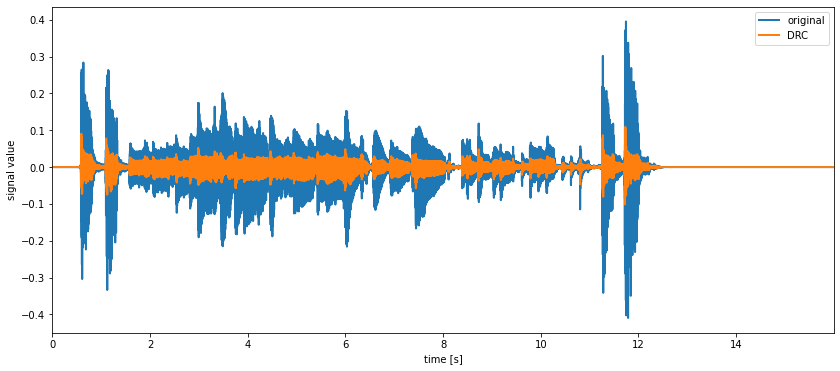

In [30]:
timeVector = np.arange(np.size(guitarSignal))/samplingFreq
plt.figure(figsize=(14,6))
plt.plot(timeVector, guitarSignal, linewidth=2, label='original')
plt.plot(timeVector, drcGuitarSignal, linewidth=2, label='DRC')
plt.xlabel('time [s]'), plt.ylabel('signal value'), plt.legend()
plt.xlim((timeVector[0],timeVector[-1]));

### Summary
1. Dynamic range expansion can be performed using
 - expander: everything below a threshold (in dB) is expanded with a compression factor
 - gate: everything below a threshold (in dB) is set to zero
2. Gain smoothing can be implemented as a first-order feedback filter with a filter coefficient depending on the state (attack og release) 
 
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lectureB_Dynamic_Range_Control/figures/ap11ExpanderSketch.png?raw=1" alt="Expander sketch" width="60%"/>
</center>